## Implementing a Logistic Regression Classifier with PyTorch

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

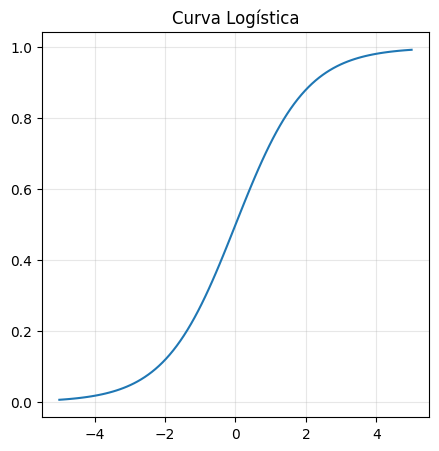

In [2]:
# Regresión logística
x = np.linspace(-5, 5, 100)
x = torch.from_numpy(x)
y = torch.sigmoid(x)
# Gráfica
plt.figure(figsize=(5, 5))
plt.plot(x, y)
plt.title('Curva Logística')
plt.grid(True, alpha=0.3)
plt.show()

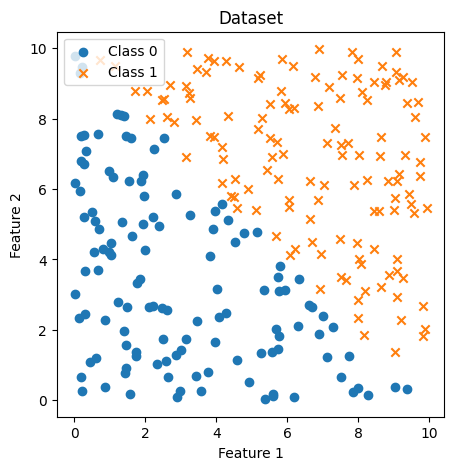

In [3]:
# Generate synthetic dataset
np.random.seed(1)
X = np.random.rand(256, 2) * 10  # 100 samples, 2 features
y = (X[:, 0] + X[:, 1] > 10).astype(int)  # Binary classification

# Plot the dataset
plt.figure(figsize=(5, 5))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class 0", marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class 1", marker='x')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Dataset")
plt.legend()
plt.show()

In [4]:
# Definición de Regresión Logística en PyTorch
class LogisticRegression(torch.nn.Module):  # torch.nn.Module is the base class for all neural network modules in PyTorch
    def __init__(self, num_features):
        super().__init__()
        # https://docs.pytorch.org/docs/stable/generated/torch.nn.Linear.html
        self.linear = torch.nn.Linear(num_features, 1)  # PyTorch NN implementing  X.matmul(w) +b

    def forward(self, x):
        logits = self.linear(x)
        probas = torch.sigmoid(logits)
        return probas

In [5]:
# Convertir a tensores de PyTorch
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # (256, 1)

# Definición de modelo
torch.manual_seed(1)
model = LogisticRegression(num_features=2)

In [6]:
# Función de pérdida
criterion = torch.nn.BCELoss()  # Binary Cross Entropy
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)  # Gradiente descendente

# Entrenamiento
num_epochs = 300
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(X_tensor)
    loss = criterion(y_pred, y_tensor)
    # Backward pass
    optimizer.zero_grad()
    # Calculan y aplican los gradientes para actualizar los pesos.
    loss.backward()  # Calcula los gradientes de la función de pérdida respecto a los parámetros del modelo
    optimizer.step()  # Actualiza los pesos del modelo usando los gradientes calculados en el paso anterior.
    if (epoch+1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}]  Loss: {loss.item():.4f}")

Epoch [50/300]  Loss: 0.5626
Epoch [100/300]  Loss: 0.5240
Epoch [150/300]  Loss: 0.4913
Epoch [200/300]  Loss: 0.4635
Epoch [250/300]  Loss: 0.4396
Epoch [300/300]  Loss: 0.4190


In [7]:
# To make predictions, we do not need gradient computation
with torch.no_grad():
    y_proba = model(X_tensor)
    y_pred = (y_proba > 0.5).float()
    acc = (y_pred.eq(y_tensor).sum() / len(y_tensor)).item()
    print(f"Accuracy: {acc:.3f}")

Accuracy: 0.832
